In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import datetime

import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [2]:
# Import weather data from .txt file, skip first two rows
df = pd.read_csv("all_data_dec_22.txt", header = None, skiprows = 2, parse_dates = [[0, 1]], 
                     dayfirst = True, sep = "\t", na_values = "---")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,2021-02-15 08:30:00,8.9,8.9,8.6,83.0,6.2,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2044,702,1,100.0,30
1,2021-02-15 09:00:00,9.2,9.2,8.9,83.0,6.4,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2045,702,1,100.0,30
2,2021-02-15 09:30:00,9.1,9.2,9.0,84.0,6.5,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.2,9.65,1.2045,702,1,100.0,30
3,2021-02-15 10:00:00,9.0,9.2,8.9,84.0,6.4,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,703,1,100.0,30
4,2021-02-15 10:30:00,8.6,8.9,8.6,88.0,6.7,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,702,1,100.0,30


In [3]:
# Replace headers
header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'Bar', 'Rain', 'Rain Rate', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'In EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()
# df.dtypes
# Other values
# Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV Index', 'UV Dose', 'Hi UV', 

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2021-02-15 08:30:00,8.9,8.9,8.6,83.0,6.2,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2044,702,1,100.0,30
1,2021-02-15 09:00:00,9.2,9.2,8.9,83.0,6.4,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2045,702,1,100.0,30
2,2021-02-15 09:30:00,9.1,9.2,9.0,84.0,6.5,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.2,9.65,1.2045,702,1,100.0,30
3,2021-02-15 10:00:00,9.0,9.2,8.9,84.0,6.4,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,703,1,100.0,30
4,2021-02-15 10:30:00,8.6,8.9,8.6,88.0,6.7,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,702,1,100.0,30


In [11]:
# Resample by week
psw = df.resample('W', on = 'DateTime')['Temp Out'].mean()

# Turn resample series into df
dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Week', 'Average Temperature'])

# Tidy up week names
#dfw['Week'] = dfw['Week'].dt.date

dfw.head()

,Week,Average Temperature
0,2021-02-21,8.018495
1,2021-02-28,8.215179
2,2021-03-07,4.883631
3,2021-03-14,6.197024
4,2021-03-21,7.633333


In [5]:
dfw.to_csv('temperature_weeks.csv')

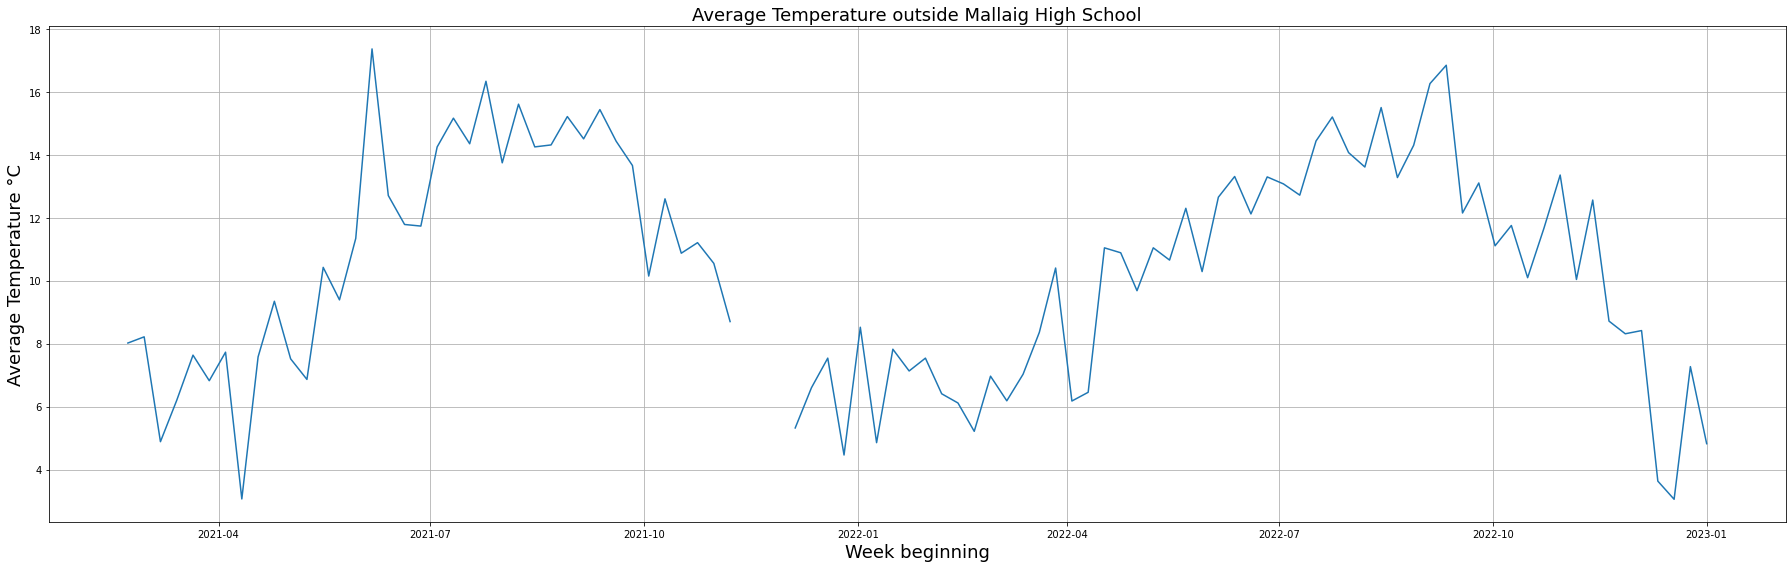

In [6]:
# Plot bar chart
dfw.plot.line(x = 'Week', y = 'Average Temperature', figsize=(25,8), grid = True, legend=False)

plt.title("Average Temperature outside Mallaig High School", fontsize = 18)
plt.xlabel("Week beginning", fontsize = 18)
plt.ylabel("Average Temperature °C", fontsize = 18)

plt.tight_layout()

plt.savefig('mhs_average_temperature_week', dpi = 200)

In [16]:
# Resample by month
psm = df.resample('M', on = 'DateTime')['Temp Out'].mean()

# Turn resample series into df
dfm = pd.DataFrame((list(zip(psm.index, psm))), columns =['Month', 'Average Temperature'])

# Tidy up week names
dfm['Month'] = dfm['Month'].dt.month_name() + ' ' + dfm['Month'].dt.year.astype(str)

dfm.head()

,Month,Average Temperature
0,February 2021,8.119389
1,March 2021,6.650875
2,April 2021,6.824306
3,May 2021,9.647715
4,June 2021,12.761715


In [17]:
dfm.to_csv('temperature_months.csv')

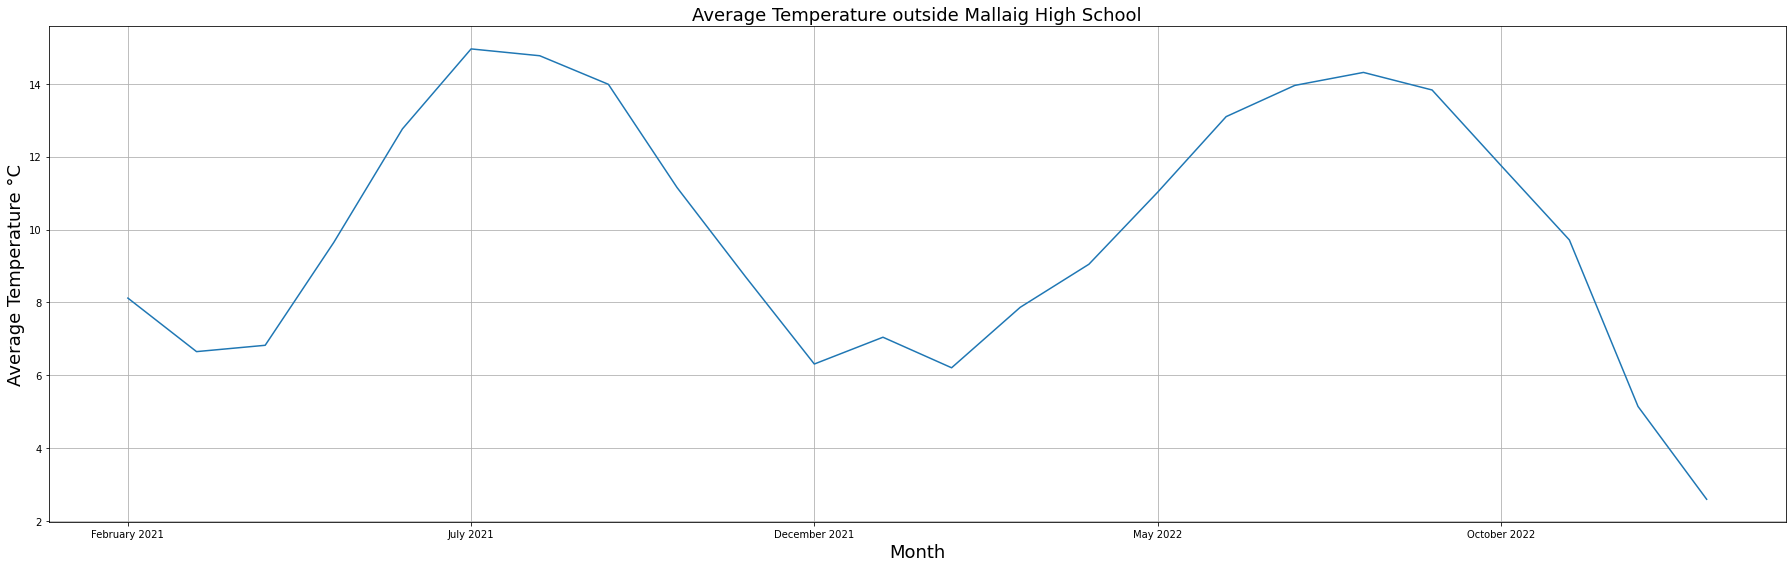

In [18]:
# Plot bar chart
dfm.plot.line(x = 'Month', y = 'Average Temperature', figsize=(25,8), grid = True, legend=False)

plt.title("Average Temperature outside Mallaig High School", fontsize = 18)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Average Temperature °C", fontsize = 18)

plt.tight_layout()

plt.savefig('mhs_average_temperature_month', dpi = 200)

In [44]:
# Select only 2022 data
df = df[df.DateTime.dt.year >= 2022]

## Temperature

In [62]:
# Resample by day
psw = df.resample('D', on = 'DateTime')['Temp Out'].mean()

# Turn resample series into df
dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Day', 'Average Temperature'])

dfw.head()

,Day,Average Temperature
0,2022-01-01,12.081250
1,2022-01-02,8.745833
2,2022-01-03,5.033333
3,2022-01-04,3.793750
4,2022-01-05,4.829167


In [63]:
dfw.to_csv('temperature_days.csv')

## Temperature with more detail

In [80]:
# Resample by day
psw = df.resample('D', on = 'DateTime')['Temp Out'].mean()
dfw1 = psw.reset_index()

psw = df.resample('D', on = 'DateTime')['Temp Out'].max()
dfw2 = psw.reset_index()

psw = df.resample('D', on = 'DateTime')['Temp Out'].min()
dfw3 = psw.reset_index()

dfw = dfw1.merge(dfw2, on = 'DateTime')

dfw = dfw.merge(dfw3, on = 'DateTime')

dfw.head()

,DateTime,Temp Out_x,Temp Out_y,Temp Out
0,2022-01-01,12.081250,15.6,9.4
1,2022-01-02,8.745833,9.7,7.4
2,2022-01-03,5.033333,8.7,2.8
3,2022-01-04,3.793750,4.7,2.4
4,2022-01-05,4.829167,5.7,3.5


In [81]:
dfw.to_csv('temperature_days_detail.csv')

## Wind

In [23]:
# Resample by day
psw = df.resample('D', on = 'DateTime')['Wind Speed'].mean()

# Turn resample series into df
dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Day', 'Average Windspeed'])

dfw.head()

,Day,Average Windspeed
0,2022-01-01,16.791667
1,2022-01-02,15.812500
2,2022-01-03,10.145833
3,2022-01-04,12.250000
4,2022-01-05,7.812500


In [24]:
dfw.to_csv('wind_days.csv')

## Rain

In [27]:
# Resample by day
psw = df.resample('D', on = 'DateTime')['Rain'].sum()

# Turn resample series into df
dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Day', 'Average Rain'])

dfw.head()

,Day,Average Rain
0,2022-01-01,0.25
1,2022-01-02,7.11
2,2022-01-03,1.52
3,2022-01-04,0.25
4,2022-01-05,0.00


In [28]:
dfw.to_csv('rain_days.csv')

## Find Max / Min values

In [37]:
# Find max / min values

#col = 'Wind Speed'
col = 'Temp Out'

max_x = df.loc[df[col].idxmax()]
print(max_x)

# min_x = df.loc[df[col].idxmin()]
# print(min_x)

DateTime          2022-09-05 18:00:00
Temp Out                         23.1
Hi Temp                          23.2
Low Temp                         22.8
Out Hum                          53.0
Dew Pt.                          13.0
Wind Speed                        3.0
Wind Dir                           SE
Wind Run                          1.5
Hi Speed                          8.0
Hi Dir                            SSE
Wind Chill                       23.1
Heat Index                       23.1
THW Index                        23.1
Bar                            1010.3
Rain                              0.0
Rain Rate                         0.0
Heat D-D                          0.0
Cool D-D                          0.1
In Temp                          24.1
In Hum                             60
In Dew                           15.9
In Heat                          24.3
In EMC                          10.93
In Air Density                 1.1635
Wind Samp                         702
Wind Tx     